In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
print("Setup Complete")

Setup Complete


In [21]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Diabetic: 34.89583333333333%
Non Diabetic: 65.10416666666666%



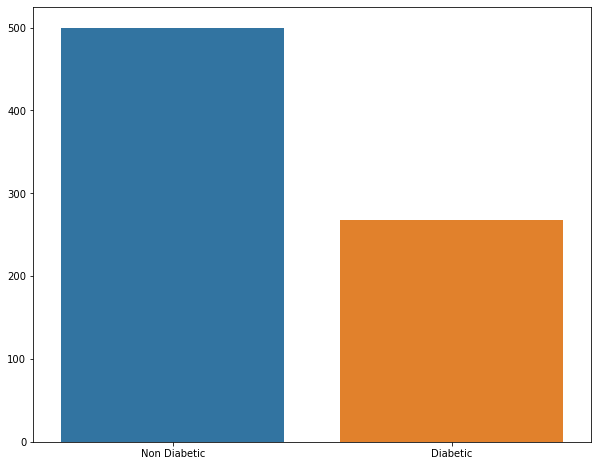

In [17]:
counts = df["Outcome"].value_counts()
diag_cols = ["Non Diabetic", "Diabetic"]
diag_counts = [counts[0], counts[1]]

nd = (diag_counts[0] / sum(diag_counts))*100
d = (diag_counts[1] / sum(diag_counts)) * 100

print(f"Diabetic: {d}%")
print(f"Non Diabetic: {nd}%")

print()

plt.figure(figsize = (10, 8))
sns.barplot(x = diag_cols, y = diag_counts)
plt.show()

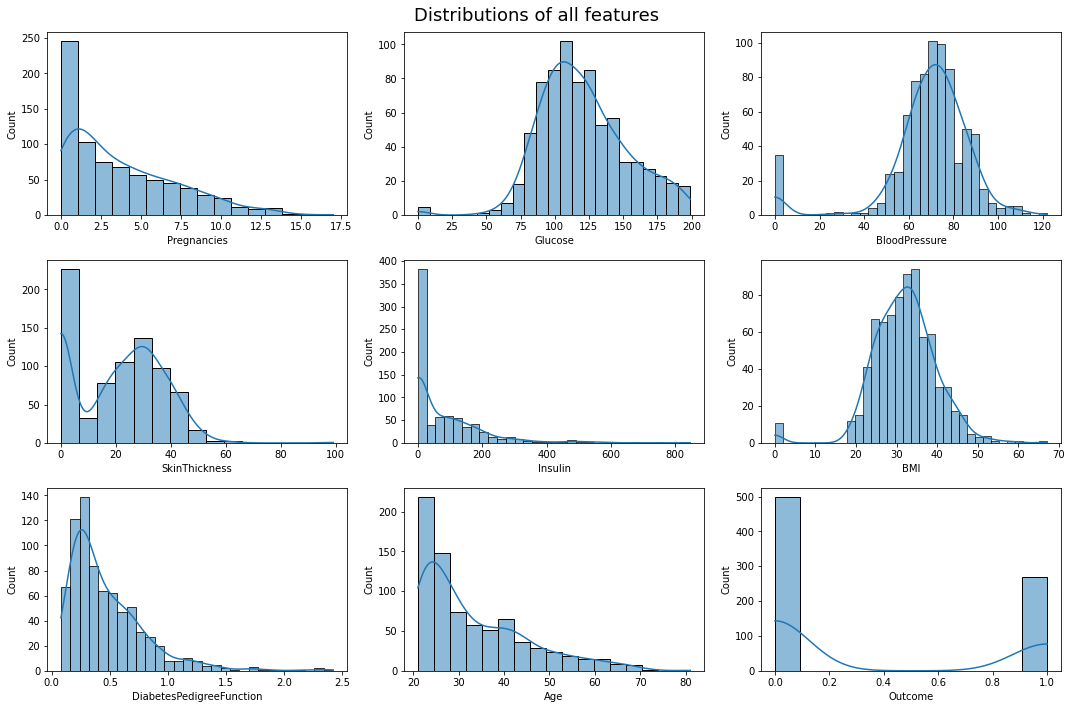

In [19]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(df, ax.flatten()):
    sns.histplot(x = df[column], kde = True, ax = subplot)

fig.suptitle('Distributions of all features', fontsize = 18)
fig.tight_layout()
plt.show()

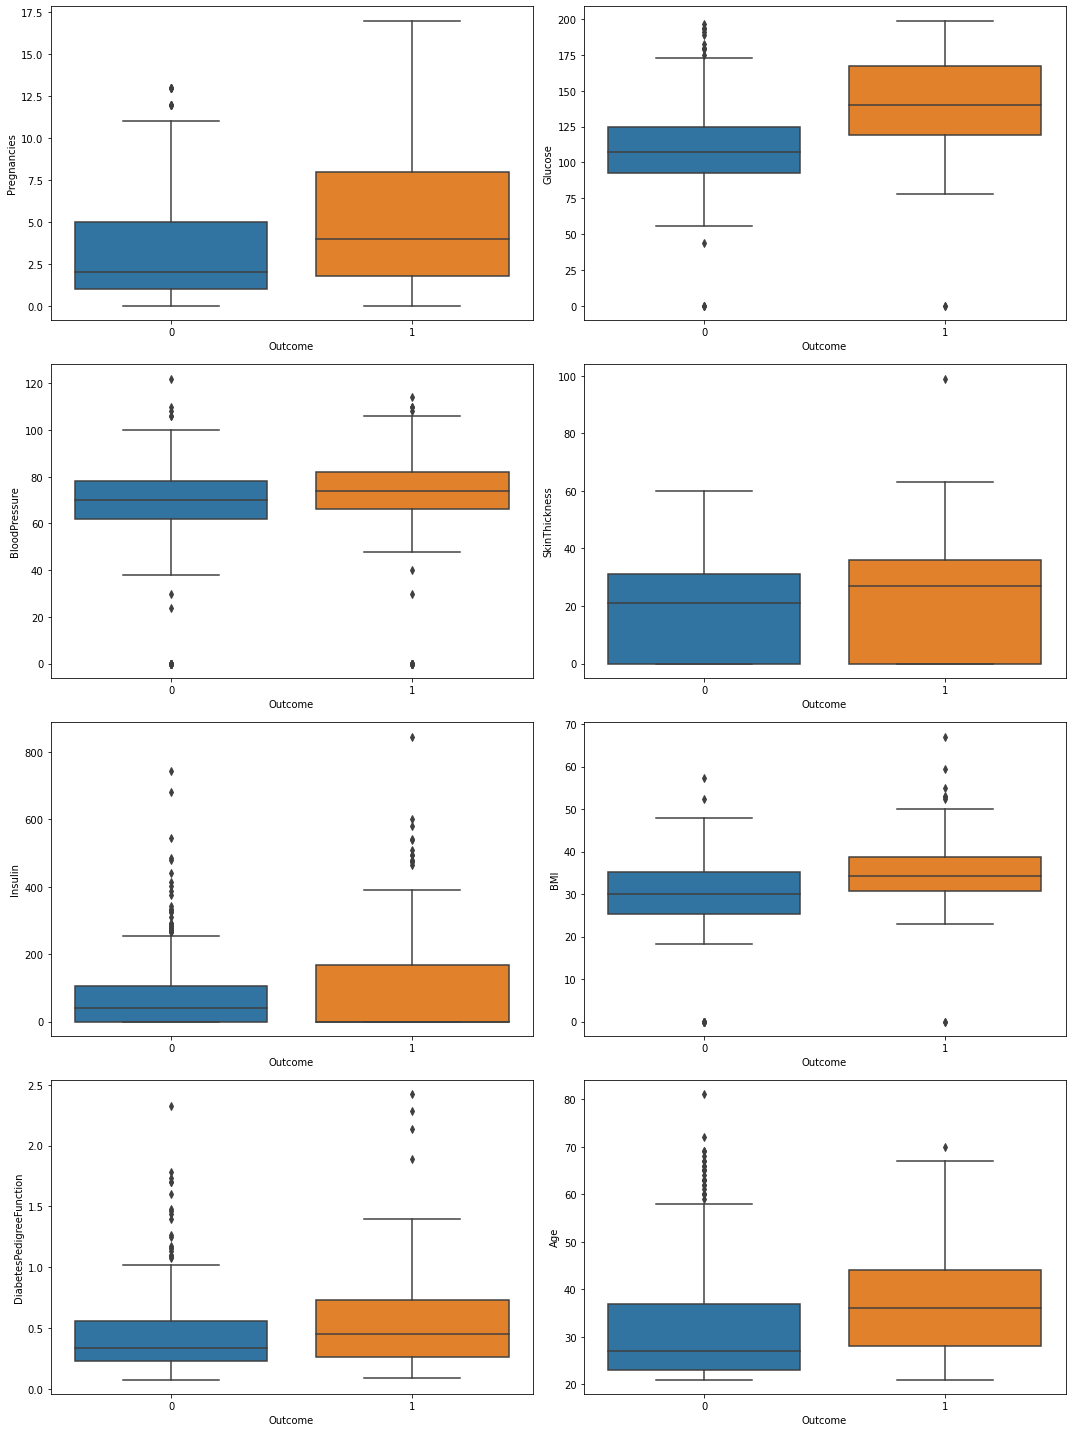

In [20]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))
for column, subplot in zip(df, ax.flatten()):
    if column == 'Outcome':
        continue
    sns.boxplot(x = df.Outcome, y = df[column], ax = subplot)
    
fig.tight_layout()
plt.show()

In [9]:
x = df.drop(["Outcome"], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 0]


In [14]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[120  23]
 [ 37  51]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       143
           1       0.69      0.58      0.63        88

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Predicted,0,1,All
Actual,,,
0,120,23,143
1,37,51,88
All,157,74,231


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

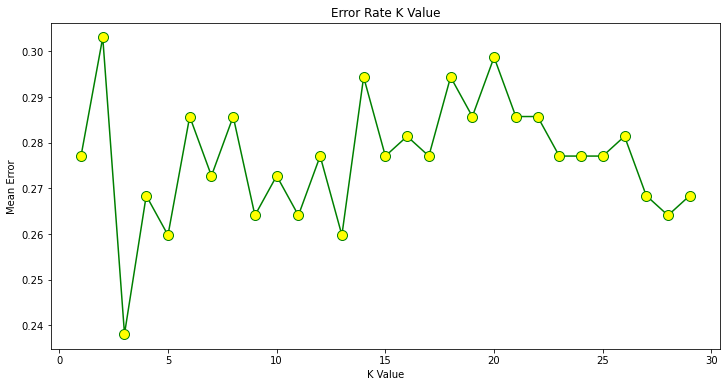

In [16]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 30): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train, y_train)
 pred_i = knn.predict(x_test)
 error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='green', linestyle='-', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
classifier1 = KNeighborsClassifier(n_neighbors=3) 
classifier1.fit(x_train, y_train)
#Prediction
y_pred2 = classifier1.predict(x_test)
print(y_pred2)

[1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 0]


In [20]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2)) 
pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[118  25]
 [ 30  58]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       143
           1       0.70      0.66      0.68        88

    accuracy                           0.76       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



Predicted,0,1,All
Actual,,,
0,118,25,143
1,30,58,88
All,148,83,231
